### Ressources Images Classification:

images
https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/exp5.html

SVM
https://zestedesavoir.com/tutoriels/1760/un-peu-de-machine-learning-avec-les-svm/

Cat or dog : bayes
https://towardsdatascience.com/cat-or-dog-introduction-to-naive-bayes-c507f1a6d1a8




In [18]:
import joblib
from skimage.io import imread
from skimage.transform import resize

import collections
import pandas as pd

In [19]:
#matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [104]:

 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
   #data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['description'] = f"resized ({int(width)}x{int(height)}) animal images in rgb"
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for animal in include:
        
        print(animal)
        current_path = os.path.join(src, animal)
 
        for file in os.listdir(current_path):
            if file[-3:] in {'jpg', 'png'}:
               

                im = imread(os.path.join(current_path, file))
                im = resize(im, (width, height)) #[:,:,::-1]
                data['label'].append(animal[:-4])
                data['filename'].append(file)
                data['data'].append(im)
 
        joblib.dump(data, pklname)
    
    return data, joblib.dump(data, pklname)
    

#### 3. Créer le jeu de données en vous servant de votre fonction précédemment créée. Il y a pas mal d'animaux inclus dans le jeu de données, sélectionnez 8 classes d’animaux de votre choix. Nous définissons la largeur (et la hauteur) à 80 pixels.


In [21]:
# On utilise un chemain relatif 
data_path = './AnimalFace/Image'

base_name = 'animal_faces'
width = 80
 
include = {'ChickenHead', 'BearHead', 'ElephantHead', 'RabbitHead',
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
 
data, jobpk = resize_all(src=data_path, pklname=base_name, width=width, include=include)

EagleHead
BearHead
DeerHead
ElephantHead
ChickenHead
MonkeyHead
RabbitHead
PandaHead


#### 4. Analysez le nouveau jeu de données fraîchement créé (nombre d’échantillons, les éléments “clés” des données, taille des images, labels des images).


In [22]:
#Quelques caractéristiques de notre data 
l = data.keys()
tailleImage = data['data'][0].shape
tailleDic = len(data['data'])
labels =  np.unique((data['label']))

print(f" Notre Data englobe les infos suivantes : {list(l)}")
print(f" La taille d'une image est  : {tailleImage}")
print(f" le nombre d'enregistrement   : {tailleDic}")
print(f" les labels   : {labels}")

 Notre Data englobe les infos suivantes : ['description', 'label', 'filename', 'data']
 La taille d'une image est  : (80, 80, 3)
 le nombre d'enregistrement   : 816
 les labels   : ['Bear' 'Chicken' 'Deer' 'Eagle' 'Elephant' 'Monkey' 'Panda' 'Rabbit']


19200


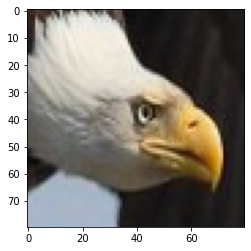

In [23]:
# si on veut voir la tête de la première photo 
image1 = data['data'][0]
print(image1.size)
plt.imshow(image1)
plt.show()

#### 5. Affichez un exemple de chaque animal inclus dans le jeu de données :


Bear


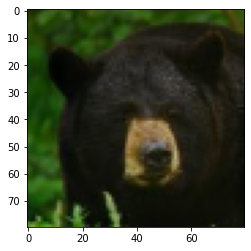

Chicken


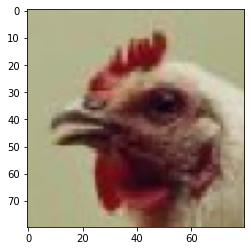

Deer


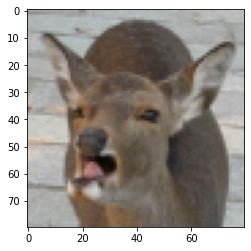

Eagle


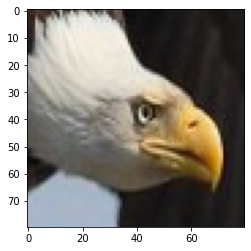

Elephant


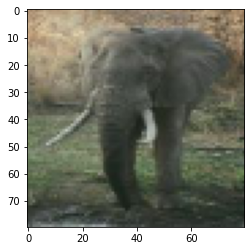

Monkey


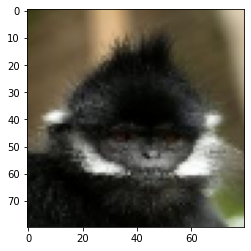

Panda


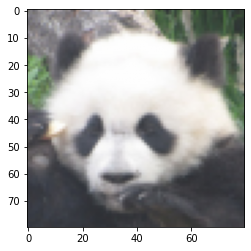

Rabbit


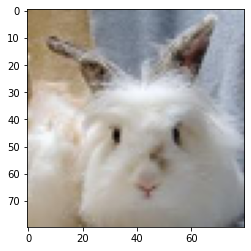

In [24]:
for lab in labels :
    idx = data['label'].index(lab)
    image = data['data'][ idx ]
    print( data['label'][ idx ])
    plt.imshow(image)
    #plt.xlabel(label)
   # plt.legend()
    plt.show()
    


#### 6. Diviser vos données en un ensemble de test et un ensemble de train avec la fonction train_test_split de scikit-learn (80% de l'ensemble total pour l'entraînement et le reste pour l'ensemble de test). 
Nous précisons le paramètre 'shuffle=True' afin d'assurer une répartition aléatoire en mélangeant les données avant de les fractionner. De cette façon, nous égalisons les distributions dans l'ensemble de train et de test et les rendons comparables.


In [25]:
X = np.array(data['data'])
y = np.array(data['label'])


In [26]:
print(f"shape X : {X.shape}")
print(f"shape y : {y.shape}")
   
      

shape X : (816, 80, 80, 3)
shape y : (816,)


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=0, shuffle=True)


In [29]:
print(f"y_train size : {y_train.size}")
print(f"y_test size : {y_test.size}")

y_train size : 652
y_test size : 164


#### 7. Vérifier que la distribution des photos dans l'ensemble de format

In [30]:
unique, counts = np.unique(y, return_counts=True)

dic= {i : j for i,j in zip(unique, counts)}
distrution = pd.DataFrame.from_dict(dic, orient='index',columns=['Quantité'])
distrution['Pourcentage'] = round(( distrution['Quantité'] / y.size) *100) 

distrution

Quantité  Pourcentage
Bear           101         12.0
Chicken        100         12.0
Deer           101         12.0
Eagle           97         12.0
Elephant       100         12.0
Monkey         100         12.0
Panda          117         14.0
Rabbit         100         12.0

In [31]:
# Vérifier la distrubution dans le train set
unique1, counts1 = np.unique(y_train, return_counts=True)

dic_train = {u : c for u,c in zip(unique1, counts1)}
distrutionTrain = pd.DataFrame.from_dict(dic_train, orient='index',columns=['Quantité'])
distrutionTrain['Pourcentage'] = round(( distrutionTrain['Quantité'] / y_train.size) *100) 

distrutionTrain


Quantité  Pourcentage
Bear            88         13.0
Chicken         70         11.0
Deer            79         12.0
Eagle           76         12.0
Elephant        85         13.0
Monkey          84         13.0
Panda           90         14.0
Rabbit          80         12.0

In [32]:
# Vérifier la distrubution dans le test set

unique2, counts2 = np.unique(y_test, return_counts=True)

dic_test = {k : v for k,v in zip(unique2, counts2)}
distrutionTest = pd.DataFrame.from_dict(dic_test, orient='index',columns=['Quantité'])
distrutionTest['Pourcentage'] = round(( distrutionTest['Quantité'] / y_test.size) *100) 
distrutionTest

Quantité  Pourcentage
Bear            13          8.0
Chicken         30         18.0
Deer            22         13.0
Eagle           21         13.0
Elephant        15          9.0
Monkey          16         10.0
Panda           27         16.0
Rabbit          20         12.0

In [33]:
# comaparaison de la distribution des catégoriés au sein de y, y_train, y_test
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=labels, y=distrution['Pourcentage'],
                    mode='lines',
                    name='y'))
fig.add_trace(go.Scatter(x=labels, y=distrutionTrain['Pourcentage'],
                    mode='lines',
                    name='y_train'))
fig.add_trace(go.Scatter(x=labels, y=distrutionTest['Pourcentage'],
                    mode='lines',
                    name='y_test'))


Sur ce jeux de données le y et y-train ont une distribution proche à l'inverse du y_test qui présente une divergeance au niveau de 2 catégoriés. Nous essayerons de voir le résultat avec cette configuration. Puis, nous itérons dans un deuxième temps avec une répartition équilibrée.
Une manière d'avoir une distribution identique pour les 3 est de le faire manuellement. Nous y reviendrons.

In [34]:
from skimage.feature import hog
from skimage import  exposure
from skimage.color import rgb2gray

le HOG-SVM est utilisé en tantque Une approche de la reconnaissance d'objets, HOG-SVM signifie Histogramme des gradients orientés et des machines à vecteurs de support. Les HOG sont utilisés pour la réduction des caractéristiques, en d'autres termes : pour réduire la complexité du problème, tout en maintenant autant de variations que possible.

LE "rgb2gray(original)" est une manière de réduire les dimensions d'image en passant à un niveau de gris.

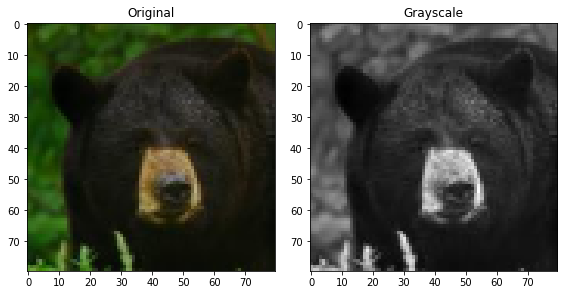

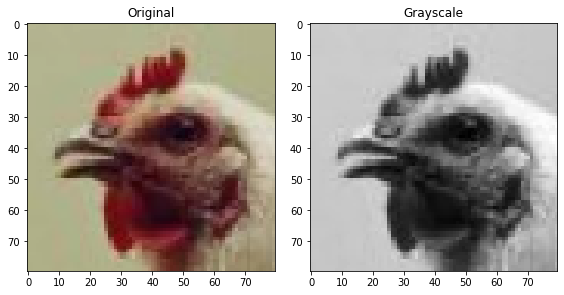

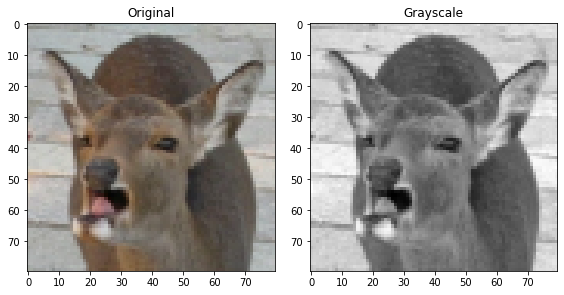

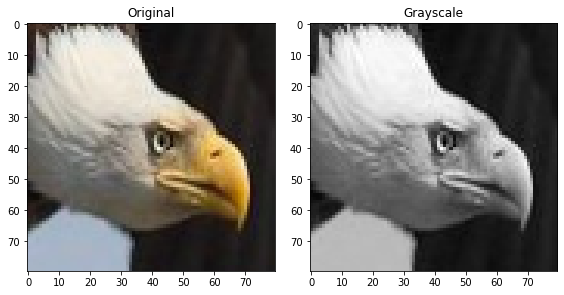

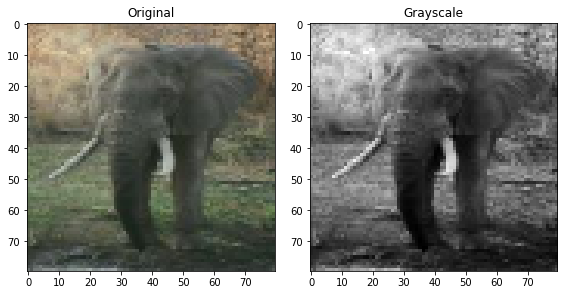

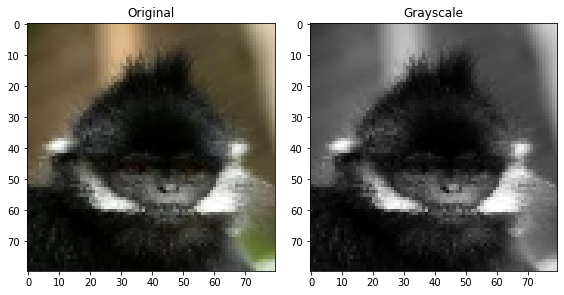

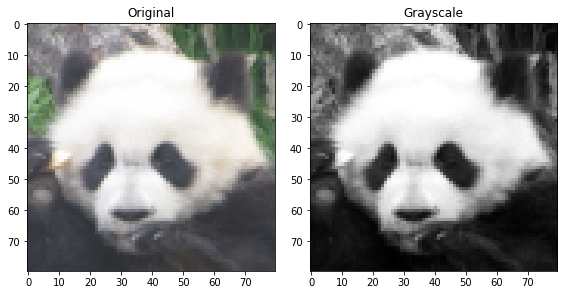

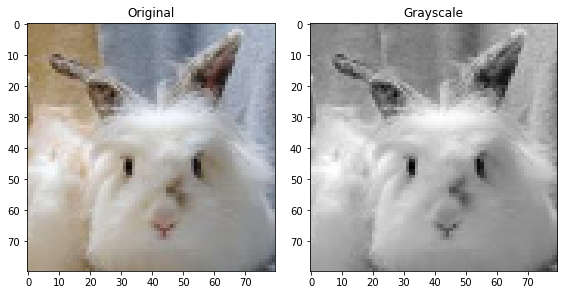

In [35]:

for lab in labels :
    idx = data['label'].index(lab)
    original = data['data'][ idx ]

    grayscale = rgb2gray(original)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    ax = axes.ravel()

    ax[0].imshow(original)
    ax[0].set_title("Original")
    ax[1].imshow(grayscale, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")

    fig.tight_layout()
    plt.show()


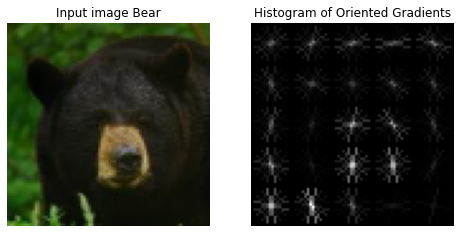

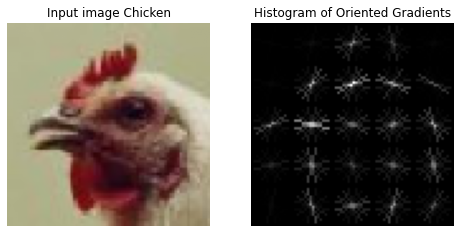

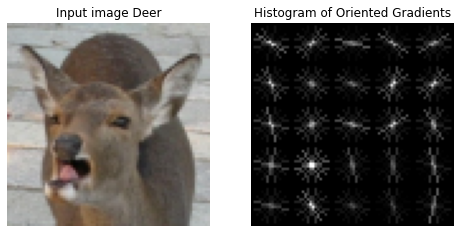

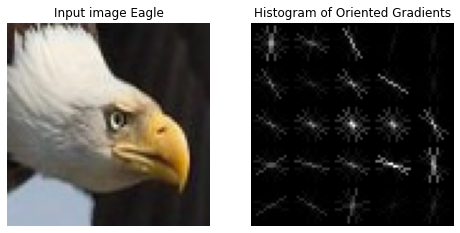

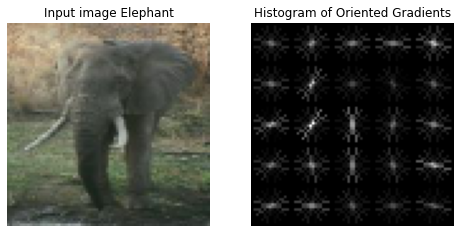

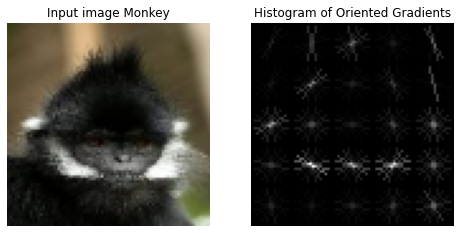

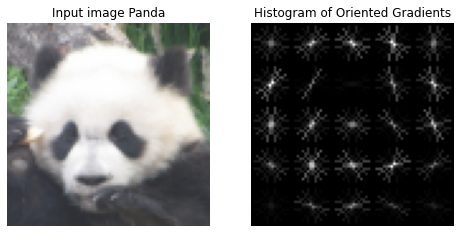

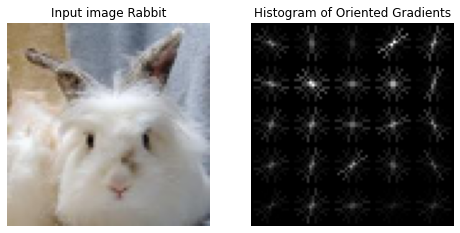

In [36]:


for lab in labels :
    idx = data['label'].index(lab)
    image = data['data'][ idx ]
 

    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title(f"Input image {data['label'][ idx ]}")

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show() 



    

Il nous faudrait un peu "beaucoup" d'imagination pour l'oeil humaine pour trouver les bons labels. Nous verrons la réaction de notre modèle par la suite

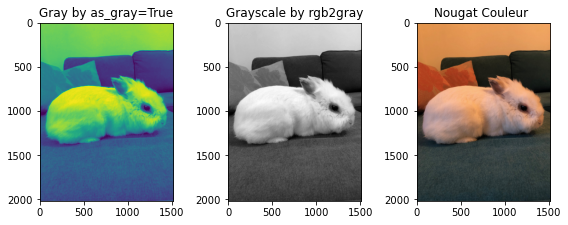

size nougat couleur: 9144576
size as_gray=True: 3048192
size rgb2gray couleur: 3048192


In [38]:
nougat= './NougatImage/nounou3.jpg'

gray = imread(nougat, as_gray=True)

nougatCouleur = imread(nougat)

grayscale = rgb2gray(nougatCouleur )

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(gray)
ax[0].set_title("Gray by as_gray=True")

ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale by rgb2gray")

ax[2].imshow(nougatCouleur)
ax[2].set_title("Nougat Couleur ")

fig.tight_layout()
plt.show()
print("size nougat couleur:", nougatCouleur .size)
print("size as_gray=True:", gray.size)
print("size rgb2gray couleur:", grayscale.size)



It turns out that the RGB to grayscale transformation and reading the image by setting the parameter "as_gray=True", gives the same result .
Afterwards, we will skip this step and replace it by reading an image by setting the level of gray = True.la suite du preporcessing, nous allons sauter cette étape et la remplacer par la lecture d'une image en fixant le niveau de gray = True.

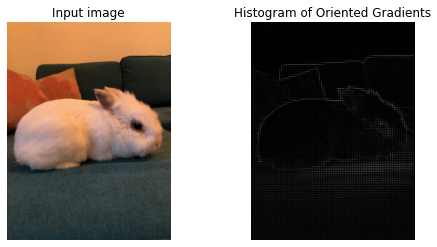

size Nougat couleur :9144576  number features:2016
size Nougat Hog:3048192 number features:2016
size Nougat rescaled:3048192 number features:2016


In [39]:
image= './NougatImage/nounou3.jpg'
image1= imread(image)

#image = data.astronaut()

fd, hog_image = hog(image1, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image1, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

print(f"size Nougat couleur :{image1.size}  number features:{image1.shape[0]}")
print(f"size Nougat Hog:{hog_image.size} number features:{hog_image.shape[0]}")
print(f"size Nougat rescaled:{hog_image_rescaled.size} number features:{hog_image_rescaled.shape[0]}")





nous devons convertir les images couleur en niveaux de gris, calculer leurs HOG et enfin mettre à l'échelle les données. Pour cela, nous utilisons trois transformateurs à la suite: RGB2GrayTransformer, HOGTransformer et StandardScaler.
Le résultat final est un tableau avec un HOG pour chaque image de l'entrée.

#### Créer vos classes  RGB2GrayTransformer and HOGTransformer
We create only the HOGTransformer class and we optimize it


In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [42]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(652, 576)


In [43]:
# create an instance of each transformer

hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step

X_train_hog = hogify.fit_transform(X_train)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(652, 576)


#### 9. Train a classifier
We will start with Stochastic Gradient Descent (SGD), as it is fast and works relatively well.


In [52]:
#initialisation du modèle SGD
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)



SGDClassifier(random_state=42)

In [53]:
# training
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [54]:
# prédication
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))


[ True  True  True  True  True False False  True  True  True  True  True
  True  True False False  True  True  True  True  True  True False False
  True]

Percentage correct:  82.92682926829268


In [56]:
image= './NougatImage/nounou3.jpg'

#image= './AnimalFace/Image/RabbitHead/rabbitfrontalfrontal0001.jpg'
image= imread(image, as_gray = True)

nougat80X80= resize(image,(80,80))
print(nougat80X80.shape)

X_test_gray = grayify.transform([nougat80X80])
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

print(f"size X_test_prepared {X_test_prepared.shape}")

nougat_pred = sgd_clf.predict(X_test_prepared)
nougat_pred

(80, 80)
size X_test_prepared (1, 576)


/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning:

The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.



array(['Eagle'], dtype='<U8')

#### I didn't know I had a white eagle at home !

In [57]:
def predictAnimal(image):
    image= imread(image, as_gray = True)

    nougat80X80= resize(image,(80,80))
    print(nougat80X80.shape)

    X_test_gray = grayify.transform([nougat80X80])
    X_test_hog = hogify.transform(X_test_gray)
    X_test_prepared = scalify.transform(X_test_hog)

    #print(f"size X_test_prepared {X_test_prepared.shape}")

    y_pred = sgd_clf.predict(X_test_prepared)
    return y_pred

image= './AnimalFace/Image/RabbitHead/rabbitfrontalfrontal0001.jpg'

print(predictAnimal(image))
                                  
    

(80, 80)
['Rabbit']


/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning:

The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.



In [63]:
# The panda is un  elephant
image= './TestAnimal/panda1.jpeg'
print(predictAnimal(image))

(80, 80)
['Elephant']


/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning:

The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.



In [64]:
# Eagle is an eagle
image= './TestAnimal/eagle1.jpeg'
print(predictAnimal(image))

(80, 80)
['Eagle']


/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning:

The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.



In [65]:
# another rabbit caught like an elephant
image= './TestAnimal/rabbit1.jpeg'
print(predictAnimal(image))

(80, 80)
['Elephant']


/home/sacia/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning:

The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.



#### 10. Évaluer les faux positifs grâce à une matrice de confusion.


Un pourcentage de 82 %, c'est bien, mais qu'en est-il des faux positifs, par exemple ? Pour mieux comprendre les résultats, nous pouvons utiliser une matrice de corrélation. Il s'agit d'un tableau où chaque ligne correspond à une étiquette, et chaque colonne à une prédiction.

In [66]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [67]:
cmx = confusion_matrix(y_test, y_pred)
cmx
#['Bear' 'Chicken' 'Deer' 'Eagle' 'Elephant' 'Monkey' 'Panda' 'Rabbit']

array([[12,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 25,  1,  2,  0,  1,  0,  1],
       [ 2,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  2,  0, 16,  0,  1,  0,  2],
       [ 0,  0,  0,  0, 12,  2,  1,  0],
       [ 3,  1,  0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  2,  1,  2, 22,  0],
       [ 1,  0,  1,  1,  0,  0,  0, 17]])

In [68]:
 from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Bear       0.67      0.92      0.77        13
     Chicken       0.89      0.83      0.86        30
        Deer       0.87      0.91      0.89        22
       Eagle       0.76      0.76      0.76        21
    Elephant       0.92      0.80      0.86        15
      Monkey       0.67      0.75      0.71        16
       Panda       0.96      0.81      0.88        27
      Rabbit       0.85      0.85      0.85        20

    accuracy                           0.83       164
   macro avg       0.82      0.83      0.82       164
weighted avg       0.84      0.83      0.83       164



#### 11. Mettre en place un pipeline qui pré-traite les données 
(RGB2GrayTransformer(),
HogTransformer(),
StandardScaler())
entraîne le modèle et nous permet de modifier les paramètres plus facilement.


In [59]:
from sklearn.pipeline import Pipeline

 
HOG_pipeline = Pipeline([
    ('hogify', HogTransformer(
        pixels_per_cell=(14, 14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
print('Percentage correct: ', round(100*np.sum(clf.predict(X_test) == y_test)/len(y_test)))

Percentage correct:  86


In [94]:
# nougat est toujours un aigle même avec un pipeline
image= './NougatImage/nounou3.jpg'

#image= './AnimalFace/Image/RabbitHead/rabbitfrontalfrontal0001.jpg'
image= imread(image, as_gray = True)

nougat80X80= resize(image,(80,80))
print(nougat80X80.shape)

nougat_pred = HOG_pipeline.predict([nougat80X80])
nougat_pred

(80, 80)


array(['Eagle'], dtype='<U8')

#### Grid search


En utilisant un pipeline, nous pouvons optimiser à la fois les transformations et le classificateur en une seule procédure. De plus, au lieu de modifier manuellement les paramètres, nous pouvons utiliser un GridSearchCV. 

#### Pour cela, définir une grille de paramètres (param_grid = [{...}]).
Pour les transformer, nous allons jouer sur les parametres de HogTransformer. Pour le classifiers, nous choisirons entre le SGD et le SVM. Le serach gril est composée de 2 dictionnaires : parametres transformes et classifiers. Comme le prétraitement optimal peut varier en fonction du modèle, il est souvent judicieux de les rechercher ensemble dans la grille pour trouver l'optimum global. Ainsi, une meilleure grille serait celle où les paramètres de hogification et de classification sont modifiés ensemble (en les plaçant dans un seul dictionnaire)


In [60]:
from pprint import pprint
from sklearn import svm
from sklearn.linear_model import SGDClassifier

# Look at parameters used by our model
sgd_model =  SGDClassifier()
svm_model = svm.SVC()
print('SGD parameters :\n')
pprint(sgd_model.get_params())
print('\n SVM parameters :\n')
pprint(svm_model.get_params())

SGD parameters :

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

 SVM parameters :

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [ ]:
### 12. Pour cela, définir une grille de paramètres (param_grid = [{...}]).


In [71]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {
        'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12)]
    },
    {
        'hogify__orientations': [8],
         'hogify__cells_per_block': [(3, 3)],
         'hogify__pixels_per_cell': [(8, 8)],
         'classify': [
             SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
             svm.SVC(kernel='linear')
         ]
    }
]

In [72]:
grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  1.6min finished


In [73]:
# description of the best performing object, a pipeline in our case.
grid_res.best_estimator_

Pipeline(steps=[('hogify', HogTransformer(orientations=8)),
                ('scalify', StandardScaler()),
                ('classify', SVC(kernel='linear'))])

In [ ]:
pp.pprint(grid_res.best_params_)

In [82]:
param_grid2 = [
   
    {
        'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12)],
         'classify': [
             SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
             svm.SVC(kernel='linear')
         ]
    }
]

In [83]:
grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid2, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  2.7min finished


In [84]:
# description of the best performing object, a pipeline in our case.
grid_res.best_estimator_
pp.pprint(grid_res.best_params_)

{   'classify': SVC(kernel='linear'),
    'hogify__cells_per_block': (3, 3),
    'hogify__orientations': 9,
    'hogify__pixels_per_cell': (8, 8)}


In [85]:
# definition d'une pipeline avec les best_params_ obtenus
HOG_pipeline = Pipeline([
    ('hogify', HogTransformer(
        pixels_per_cell=(8, 8), 
        cells_per_block=(3, 3), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', svm.SVC(kernel='linear'))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
print('Percentage correct: ', round(100*np.sum(clf.predict(X_test) == y_test)/len(y_test)))

Percentage correct:  93


In [97]:
image= './TestAnimal/panda1.jpeg'
image= imread(image, as_gray = True)
imageResized= resize(image,(80,80))
y1 = HOG_pipeline.predict([imageResized])
y1



array(['Elephant'], dtype='<U8')

#### Naive Bayes
Naive Bayes est  un classificateur probabiliste. La classe ou l'étiquette que l'algorithme apprend à prédire est le résultat de la création de la distribution de probabilité de toutes les classes qui lui sont présentées.

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
param_grid3 = [
       {   'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12)],
         'classify': [
             SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
             svm.SVC(kernel='linear'),
             GaussianNB()
         ]
    }
]

grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid3, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

# description of the best performing object, a pipeline in our case.
print(grid_res.best_estimator_)
pp.pprint(grid_res.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  3.8min finished


Pipeline(steps=[('hogify', HogTransformer()), ('scalify', StandardScaler()),
                ('classify', SVC(kernel='linear'))])
{   'classify': SVC(kernel='linear'),
    'hogify__cells_per_block': (3, 3),
    'hogify__orientations': 9,
    'hogify__pixels_per_cell': (8, 8)}


En introduisant le Naive Bayes dans le GridSearchCV,cela n'a aucun incidant sur le choix du meilleur modèle. cela reste toujours le SVC(kernel='linear') 

In [109]:
#Refaire une itération avec des image recharger directement en gris et avec une taille de 
#120 x 120

 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
   #data['description'] = 'resized ({0}x{1})animal images in rgb.format(int(width), int(height))
    data['description'] = f"resized ({int(width)}x{int(height)}) animal images in gray"
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for animal in include:
        
        print(animal)
        current_path = os.path.join(src, animal)
 
        for file in os.listdir(current_path):
            if file[-3:] in {'jpg', 'png'}:
                #im = imread(os.path.join(current_path, file))
                im = imread(os.path.join(current_path, file), as_gray=True)
                im = resize(im, (width, height)) #[:,:,::-1]
                data['label'].append(animal[:-4])
                data['filename'].append(file)
                data['data'].append(im)
 
        joblib.dump(data, pklname)
    
    return data, joblib.dump(data, pklname)
    

In [110]:
# On utilise un chemain relatif 
# l'introduction des photos de nougat dans le data set et un resize à 120
# refaire le preprocessing sans hog
data_path = './AnimalFace/Image'

base_name = 'animal_faces'
width = 120
 
include = {'ChickenHead', 'BearHead', 'ElephantHead', 'RabbitHead',
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
 
data, jobpk = resize_all(src=data_path, pklname=base_name, width=width, include=include)

EagleHead
BearHead
DeerHead
ElephantHead
ChickenHead
MonkeyHead
RabbitHead
PandaHead


(120, 120)
14400


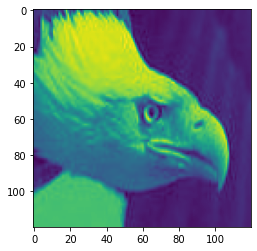

In [112]:
# si on veut voir la tête de la première photo 
image1 = data['data'][0]
print(image1.shape)
print(image1.size)
plt.imshow(image1)
plt.show()

In [114]:


X = np.array(data['data'])
y = np.array(data['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=0, shuffle=True)



In [115]:
param_grid3 = [
       {   'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12)],
         'classify': [
             SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
             svm.SVC(kernel='linear'),
             GaussianNB()
         ]
    }
]

grid_search = GridSearchCV(HOG_pipeline, 
                           param_grid3, 
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

# description of the best performing object, a pipeline in our case.
print(grid_res.best_estimator_)
pp.pprint(grid_res.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  8.3min finished


Pipeline(steps=[('hogify', HogTransformer(cells_per_block=(2, 2))),
                ('scalify', StandardScaler()),
                ('classify', SVC(kernel='linear'))])
{   'classify': SVC(kernel='linear'),
    'hogify__cells_per_block': (2, 2),
    'hogify__orientations': 9,
    'hogify__pixels_per_cell': (8, 8)}


In [116]:
# definition d'une pipeline avec les best_params_ obtenus
HOG_pipeline = Pipeline([
    ('hogify', HogTransformer(
        pixels_per_cell=(8, 8), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', svm.SVC(kernel='linear'))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
print('Percentage correct: ', round(100*np.sum(clf.predict(X_test) == y_test)/len(y_test)))

Percentage correct:  93


In [123]:
image= './TestAnimal/rabbit2.jpeg'
image= imread(image, as_gray = True)
imageResized= resize(image,(120,120))
y1 = HOG_pipeline.predict([imageResized])
y1


array(['Deer'], dtype='<U8')

In [124]:
image= './TestAnimal/rabbit1.jpeg'
image= imread(image, as_gray = True)
imageResized= resize(image,(120,120))
y1 = HOG_pipeline.predict([imageResized])
y1

array(['Elephant'], dtype='<U8')

In [125]:
image= './TestAnimal/nounou2.jpg' # nougat#
image= imread(image, as_gray = True)
imageResized= resize(image,(120,120))
y1 = HOG_pipeline.predict([imageResized])
y1

array(['Chicken'], dtype='<U8')

In [ ]:
Les résultat ne sont pas probants !

#### 15. Enregistrer vos résultats dans un fichier pickle (joblib) afin de pouvoir recharger les 


In [128]:
joblib.dump(HOG_pipeline,'model.joblib')

['model.joblib']

In [130]:
# importer le model
HOG_pipelineJob = joblib.load('model.joblib') 

In [137]:
image= './TestAnimal/nounou2.jpg' # nougat#
image= imread(image, as_gray = True)
imageResized= resize(image,(120,120))
y1 = HOG_pipelineJob.predict([imageResized])
y1

array(['Chicken'], dtype='<U8')

In [143]:
image = input("Veuillez introduire le chemin de l'image en question :")
print(image)
image= imread(image, as_gray = True)
imageResized= resize(image,(120,120))
y1 = HOG_pipelineJob.predict([imageResized])
y1

Veuillez introduire le chemin de l'image en question :./TestAnimal/nounou2.jpg
./TestAnimal/nounou2.jpg


array(['Chicken'], dtype='<U8')

In [146]:
from PIL import Image, ExifTags
file= './TestAnimal/rabbit1.jpeg'
img = Image.open(file)
k=img._getexif()
#exif = { ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS }
k

#### Nous allons nous pencher un peu sur le pre-processing des images avant de les présenter 
au model ML


In [70]:
#current_path = os.path.join(src, animal)
list_bear=[] 
for file in os.listdir(folder):
    list_bear.append(file)
print (list_bear)  

['nounou2.jpg', 'nounou3.jpg', 'nounou4.jpg', 'nounou1.jpg']


In [1]:
# trouver la liste de fichiers dans un re
import glob
folder = './NougatImage/'
list_bear=[]
print('\nNamed with wildcard *:') 
for name in glob.glob(folder+'*'): 
    list_bear.append(name)
print (list_bear)



Named with wildcard *:
['./NougatImage/nounou2.jpg', './NougatImage/nounou3.jpg', './NougatImage/nounou4.jpg', './NougatImage/nounou1.jpg']
